# 定义问题

基于05b，了解分类问题的评估指标：
- 混淆矩阵
- 精确率
- 召回率
- F1分数
- ROC曲线和AUC


# 数据预处理

In [1]:
# 导入数据包
import numpy as np # 
import pandas as pd #
import matplotlib.pyplot as plt #

In [2]:
df_member = pd.read_csv('易速鲜花会员留存.csv')
df_member

,用户码,性别,玫瑰套餐,紫罗兰套餐,郁金香套餐,百合套餐,康乃馨套餐,胡姬花套餐,生日套餐,情人节套餐,会员卡类型,入会月数,会费支付方式,平均月消费,总消费,已停付会费
0,1,女,是,是,否,是,否,是,是,否,年卡,9,手工转账,65.60,593.3,否
1,2,男,否,否,否,否,否,否,否,是,月卡,9,手工转账,59.90,542.4,否
2,3,男,否,否,否,否,是,否,否,否,月卡,4,就餐时付费,73.90,280.85,是
3,4,男,是,否,否,是,是,否,是,是,月卡,13,就餐时付费,98.00,1237.85,是
4,5,女,否,是,否,否,否,是,是,是,月卡,9,花呗付款,69.40,571.45,否
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,7039,女,否,否,是,否,否,是,否,否,年卡,13,手工转账,55.15,742.9,否
7039,7040,男,否,否,否,是,否,否,否,否,月卡,2,手工转账,50.30,92.75,否
7040,7041,男,是,否,否,否,否,否,否,是,月卡,22,就餐时付费,85.10,1873.7,是
7041,7042,男,是,是,是,否,是,是,否,是,双年卡,67,手工转账,67.85,4627.65,否


## 数据清洗

In [3]:
#把总消费字段转换成数值字段
df_member['总消费'] = pd.to_numeric(df_member['总消费'], errors='coerce')
df_member['总消费'].fillna(0, inplace=True)

## 数据可视化

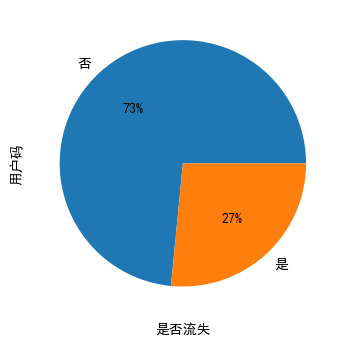

In [4]:
plt.figure(figsize=(6,4))
plt.rcParams['font.family'] = ['SimHei'] #或者 ['Microsoft YaHei']
plt.rcParams['axes.unicode_minus'] = False
ax = df_member.groupby('已停付会费').count()['用户码'].plot.pie(autopct='%1.0f%%') #饼图
plt.xlabel('是否流失')
plt.show() #显示

## 特征工程

In [5]:
df_member['已停付会费'].replace(to_replace='是', value=1, inplace=True) #流失-1
df_member['已停付会费'].replace(to_replace='否',  value=0, inplace=True) #未流失-0

In [6]:
df_member['性别'].replace(to_replace='女', value=0, inplace=True) #女生-0
df_member['性别'].replace(to_replace='男', value=1, inplace=True) #男生-1

In [7]:
# 字段中'Yes' or 'No'转换成为模型可以读取的数值,（布尔型数据，也是数值数据）
binary_features = ['玫瑰套餐', '紫罗兰套餐', '郁金香套餐', '百合套餐', '康乃馨套餐', '胡姬花套餐', 
                   '生日套餐','情人节套餐']
for field in binary_features:
    df_member[field] = df_member[field] == '是'

In [8]:
df_member

,用户码,性别,玫瑰套餐,紫罗兰套餐,郁金香套餐,百合套餐,康乃馨套餐,胡姬花套餐,生日套餐,情人节套餐,会员卡类型,入会月数,会费支付方式,平均月消费,总消费,已停付会费
0,1,0,True,True,False,True,False,True,True,False,年卡,9,手工转账,65.60,593.30,0
1,2,1,False,False,False,False,False,False,False,True,月卡,9,手工转账,59.90,542.40,0
2,3,1,False,False,False,False,True,False,False,False,月卡,4,就餐时付费,73.90,280.85,1
3,4,1,True,False,False,True,True,False,True,True,月卡,13,就餐时付费,98.00,1237.85,1
4,5,0,False,True,False,False,False,True,True,True,月卡,9,花呗付款,69.40,571.45,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,7039,0,False,False,True,False,False,True,False,False,年卡,13,手工转账,55.15,742.90,0
7039,7040,1,False,False,False,True,False,False,False,False,月卡,2,手工转账,50.30,92.75,0
7040,7041,1,True,False,False,False,False,False,False,True,月卡,22,就餐时付费,85.10,1873.70,1
7041,7042,1,True,True,True,False,True,True,False,True,双年卡,67,手工转账,67.85,4627.65,0


## 数据整理
先做数据整理工作，把每个数据字段都转换为可以处理的字段

In [9]:
# One hot encode 分类字段
category_features = ['会员卡类型', '会费支付方式']
df_member = pd.get_dummies(df_member, drop_first=True, columns=category_features)
df_member

,用户码,性别,玫瑰套餐,紫罗兰套餐,郁金香套餐,百合套餐,康乃馨套餐,胡姬花套餐,生日套餐,情人节套餐,入会月数,平均月消费,总消费,已停付会费,会员卡类型_年卡,会员卡类型_月卡,会费支付方式_微信自动扣款,会费支付方式_手工转账,会费支付方式_花呗付款
0,1,0,True,True,False,True,False,True,True,False,9,65.60,593.30,0,1,0,0,1,0
1,2,1,False,False,False,False,False,False,False,True,9,59.90,542.40,0,0,1,0,1,0
2,3,1,False,False,False,False,True,False,False,False,4,73.90,280.85,1,0,1,0,0,0
3,4,1,True,False,False,True,True,False,True,True,13,98.00,1237.85,1,0,1,0,0,0
4,5,0,False,True,False,False,False,True,True,True,9,69.40,571.45,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,7039,0,False,False,True,False,False,True,False,False,13,55.15,742.90,0,1,0,0,1,0
7039,7040,1,False,False,False,True,False,False,False,False,2,50.30,92.75,0,0,1,0,1,0
7040,7041,1,True,False,False,False,False,False,False,True,22,85.10,1873.70,1,0,1,0,0,0
7041,7042,1,True,True,True,False,True,True,False,True,67,67.85,4627.65,0,0,0,0,1,0


## 构建特征集和标签集

In [10]:
X = df_member.drop(['用户码','已停付会费'], axis = 1) # 构建特征集，用户吗字段属于无用特征
y = df_member.已停付会费.values # 构建标签集

## 拆分数据集

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 4)

# 训练模型

这里我们比较逻辑回归和神经网络两种算法

## 训练逻辑回归模型

In [12]:
from sklearn.linear_model import LogisticRegression #导入逻辑回归模型
logreg = LogisticRegression(max_iter=1000) # logreg,就代表是逻辑回归模型

In [13]:
logreg.fit(X_train,y_train) # fit,就相当于是梯度下降

LogisticRegression(max_iter=1000)

In [14]:
print("SK-learn逻辑回归预测准确率{:.2f}%".format(logreg.score(X_test,y_test)*100))

SK-learn逻辑回归预测准确率78.50%


In [15]:
y_pred_logreg = logreg.predict(X_test)
print("逻辑回归对测试集第一个用户的预测结果", y_pred_logreg[0])

逻辑回归对测试集第一个用户的预测结果 0


## 定义混淆矩阵函数

In [16]:
from sklearn.metrics import confusion_matrix # 导入混淆矩阵
import seaborn as sns #导入seaborn画图工具箱
def show_matrix(y_test, y_pred, label): # 定义一个函数显示混淆矩阵
    cm = confusion_matrix(y_test,y_pred) # 调用混淆矩阵
    plt.title(label) # 标题
    sns.heatmap(cm,annot=True,cmap="Blues",fmt="d",cbar=False) # 热力图设定
    plt.show() # 显示混淆矩阵

您提供的代码是一个用于显示混淆矩阵的函数。在这里，我将解释这段代码的工作原理。

1. 导入相关库：
   - `from sklearn.metrics import confusion_matrix`：从 sklearn 库导入混淆矩阵函数。
   - `import seaborn as sns`：导入 seaborn 库，它是一个基于 matplotlib 的强大数据可视化库，用于绘制统计图形。

2. 定义一个名为 `show_matrix` 的函数，接受三个参数：`y_test`（实际类别标签），`y_pred`（模型预测的类别标签）和`label`（混淆矩阵图的标题）。

3. 函数内部的操作：
   - 使用`confusion_matrix`函数计算两个参数（`y_test` 和 `y_pred`）之间的混淆矩阵，并将结果赋值给变量`cm`。
   - 使用`plt.title()`设置混淆矩阵图的标题。
   - 使用 seaborn 的 `sns.heatmap()` 函数创建一个热力图以显示混淆矩阵。`annot=True` 表示在每个单元格中显示数值；`cmap="Blues"` 表示使用蓝色调的颜色映射；`fmt="d"` 表示将数值格式化为整数；`cbar=False`表示不显示颜色条。
   - 使用`plt.show()`显示生成的混淆矩阵热力图。

这个函数可以方便地用来可视化分类器的预测结果，以便您可以更好地理解模型的性能，例如查看存在的假阳性和假阴性。

### 绘制逻辑回归的混淆矩阵

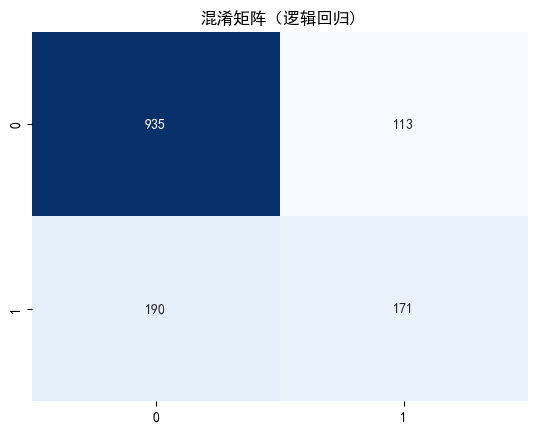

In [17]:
show_matrix(y_test, y_pred_logreg,label='混淆矩阵（逻辑回归)') # 逻辑回归

## 定义分类报告函数

In [18]:
from sklearn.metrics import classification_report # 导入分类报告
def show_report(X_test, y_test, y_pred): # 定义一个函数显示分类报告
    # print (y_pred)
    #np.set_printoptions(threshold=np.inf)
    # print (np.where(predictions > 0.5, 0, predictions))
#     if y_test.shape != (2000,1):
#         y_test = y_test.values # 把Panda series转换成Numpy array
#         y_test = y_test.reshape((len(y_test),1)) # 转换成与y_pred相同的形状 
    #target_names = [str(x) for x in lb.classes_]
    print(classification_report(y_test,y_pred,labels=[0, 1])) #打印分类报告  

您提供的代码是一个用于显示分类报告的函数。在这里，我将解释这段代码的工作原理。

1. 导入相关库：
   - `from sklearn.metrics import classification_report`：从 sklearn 库导入分类报告函数。

2. 定义一个名为 `show_report` 的函数，接受三个参数：`X_test`（测试集的输入数据，但实际上未在函数中使用），`y_test`（实际类别标签）和`y_pred`（模型预测的类别标签）。

3. 函数内部的操作：
   - 注释部分的代码用于处理不同类型的标签数据（如 Pandas Series 或不同形状的 NumPy 数组），但在这里已经被禁用，因为我们假设提供的 `y_test` 和 `y_pred` 数据格式正确无误。
   - 使用`classification_report`函数生成一个分类报告，其中包含每个类别的精度、召回率和 F1 分数（评估分类模型性能的三个重要指标）。在这种情况下，`labels=[0, 1]`意味着我们关心的是两个类别：0 和 1。
   - 使用`print`函数打印生成的分类报告。

这个函数可以方便地用来评估分类器的性能，提供每个类别的精度、召回率和 F1 分数，便于更深入地分析模型的优缺点。

### 显示逻辑回归模型的分类报告

In [19]:
show_report(X_test, y_test, y_pred_logreg)

              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1048
           1       0.60      0.47      0.53       361

    accuracy                           0.78      1409
   macro avg       0.72      0.68      0.70      1409
weighted avg       0.77      0.78      0.78      1409



 以下是对分类报告的结果的解释和评估。

1. 对于类别 0 (通常表示负样本)：
   - 精确度（Precision）：0.83，这意味着 83% 被模型预测为类别 0 的样本是真正的类别 0。精确度较高，说明模型在预测类别 0 时的效果较好。
   - 召回率（Recall）：0.89，这意味着 89% 的真正类别为 0 的样本被正确预测。相对较高的召回率表示模型能确切捕捉到大部分的类别 0 样本。
   - F1 分数（F1-score）：0.86，F1 分数综合了精确度和召回率，取值范围为 0 到 1，1 表示最佳性能。0.86 表示模型在类别 0 的预测上表现良好。

2. 对于类别 1 (通常表示正样本)：
   - 精确度（Precision）：0.60，这意味着 60% 被模型预测为类别 1 的样本是真正的类别 1。精确度较低，说明模型在预测类别 1 时效果一般。
   - 召回率（Recall）：0.47，这意味着 47% 的真正类别为 1 的样本被正确预测。召回率较低表示模型并未成功捕捉到大部分的类别 1 样本。
   - F1 分数（F1-score）：0.53，表示模型在类别 1 的预测性能一般。

3. 总体性能指标：
   - 准确率（Accuracy）：0.78，衡量了整体被正确预测的样本占总样本数的比例。准确率为 78%，意味着总体上，模型预测还算准确，但仍然有提升空间。
   - 宏平均（Macro avg）：计算精确度、召回率和 F1 分数的平均值。在这里，宏平均分数为 0.72（精确度）、0.68（召回率）和 0.70（F1 分数），表示整个模型的表现一般，但类别 0 的预测相对较好。
   - 加权平均（Weighted avg）：以每个类别的样本数为权重计算精确度、召回率和 F1 分数的加权平均值。在这里，加权平均分数为 0.77（精确度）、0.78（准确率）和 0.78（F1 分数），表明整体上模型预测性能一般且偏向类别 0。

总结：模型在类别 0 的预测上表现较好，但在类别 1 的预测上表现一般。整体准确率为 78%，可以认为模型的预测性能尚可，但还有改进空间。 若要提高模型性能，可以尝试使用不同的机器学习算法、特征选择或优化超参数等方法。

## 训练神经网络模型

In [20]:
#!pip install keras
#!pip install tensorflow

In [21]:
import keras # 导入Keras库
from keras.models import Sequential # 导入Keras序贯模型
from keras.layers import Dense # 导入Keras密集连接层
dnn = Sequential() # 创建一个序贯DNN模型
dnn.add(Dense(units=12, input_dim=17, activation = 'relu')) # 添加输入层
dnn.add(Dense(units=24, activation = 'relu')) # 添加隐层
dnn.add(Dense(units=1, activation = 'sigmoid')) # 添加输出层
dnn.summary() # 显示网络模型（这个语句不是必须的）
# 编译神经网络，指定优化器，损失函数，以及评估标准
dnn.compile(optimizer = 'RMSProp', #优化器
            loss = 'binary_crossentropy', #损失函数
            metrics = ['acc']) #评估标准

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 12)                216       
                                                                 
 dense_1 (Dense)             (None, 24)                312       
                                                                 
 dense_2 (Dense)             (None, 1)                 25        
                                                                 
Total params: 553 (2.16 KB)
Trainable params: 553 (2.16 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [22]:
X_train.shape

(5634, 17)

In [23]:
X_train = np.asarray(X_train).astype(np.float32)
X_test = np.asarray(X_test).astype(np.float32)

In [24]:
history = dnn.fit(X_train, y_train, # 指定训练集
                  epochs=30,        # 指定训练的轮次
                  batch_size=64,    # 指定数据批量
                  validation_split=0.2) #这里直接从训练集数据中拆分验证集，更方便

Epoch 1/30
71/71 [==============================] - 1s 4ms/step - loss: 6.9501 - acc: 0.6426 - val_loss: 2.1164 - val_acc: 0.7728
Epoch 2/30
71/71 [==============================] - 0s 2ms/step - loss: 2.1865 - acc: 0.6883 - val_loss: 1.6577 - val_acc: 0.7808
Epoch 3/30
71/71 [==============================] - 0s 2ms/step - loss: 2.2122 - acc: 0.6838 - val_loss: 3.7985 - val_acc: 0.3886
Epoch 4/30
71/71 [==============================] - 0s 2ms/step - loss: 2.1538 - acc: 0.6832 - val_loss: 1.5487 - val_acc: 0.7897
Epoch 5/30
71/71 [==============================] - 0s 2ms/step - loss: 2.0654 - acc: 0.6929 - val_loss: 1.1845 - val_acc: 0.7906
Epoch 6/30
71/71 [==============================] - 0s 2ms/step - loss: 2.0895 - acc: 0.7062 - val_loss: 1.1632 - val_acc: 0.7915
Epoch 7/30
71/71 [==============================] - 0s 2ms/step - loss: 2.2357 - acc: 0.7000 - val_loss: 0.9559 - val_acc: 0.7870
Epoch 8/30
71/71 [==============================] - 0s 2ms/step - loss: 2.0606 - acc: 0.71

In [25]:
def show_history(history): # 显示训练过程中的学习曲线
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(1, len(loss) + 1)
    plt.figure(figsize=(12,4))
    plt.subplot(1, 2, 1)
    plt.plot(epochs, loss, 'bo', label='Training loss')
    plt.plot(epochs, val_loss, 'b', label='Validation loss')
    plt.title('Training and validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    acc = history.history['acc']
    val_acc = history.history['val_acc']
    plt.subplot(1, 2, 2)
    plt.plot(epochs, acc, 'bo', label='Training acc')
    plt.plot(epochs, val_acc, 'b', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show() 

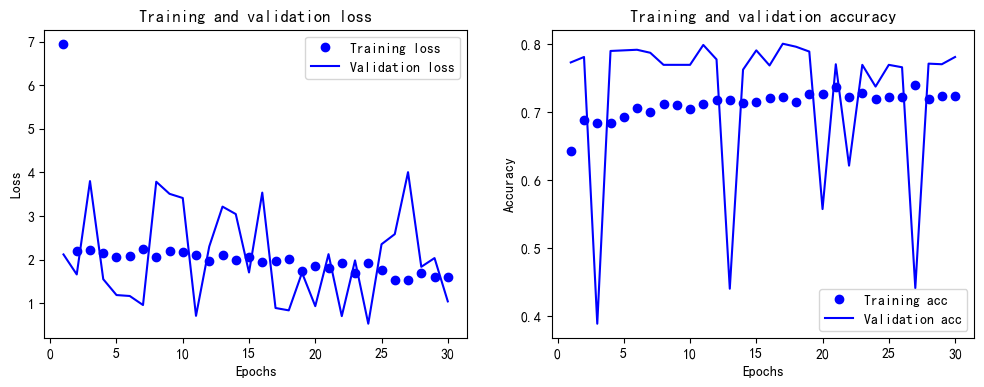

In [26]:
show_history(history) # 调用这个函数

In [27]:
result = dnn.evaluate(X_test, y_test) #评估测试集上的准确率
print('DNN的测试准确率为',"{0:.2f}%".format(result[1]))

45/45 [==============================] - 0s 1ms/step - loss: 1.3544 - acc: 0.7771
DNN的测试准确率为 0.78%


In [28]:
prediction = dnn.predict(X_test) #预测测试集的图片分类
print('第一个用户分类结果为:', np.argmax(prediction[0]))

45/45 [==============================] - 0s 737us/step
第一个用户分类结果为: 0


### 绘制混淆矩阵（神经网络归一化之前）

141/141 [==============================] - 0s 704us/step


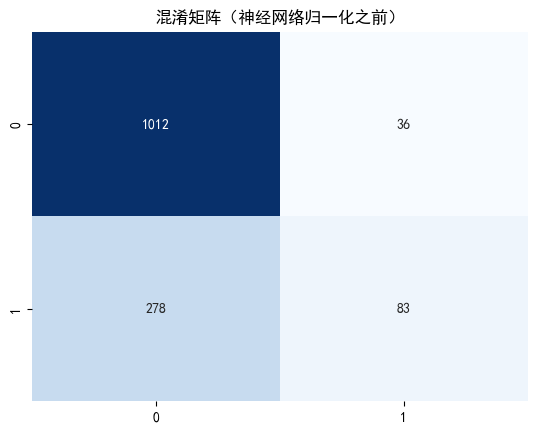

In [29]:
y_pred = dnn.predict(X_test,batch_size=10) # 预测测试集的标签
y_pred_dnn = np.round(y_pred) # 将分类概率值转换成0/1整数值
show_matrix(y_test, y_pred_dnn, label='混淆矩阵（神经网络归一化之前）') # 混淆矩阵（神经网络归一化之前）

### 显示神经网络归一化之前的分类报告

In [30]:
show_report(X_test, y_test, y_pred_dnn)

              precision    recall  f1-score   support

           0       0.78      0.97      0.87      1048
           1       0.70      0.23      0.35       361

    accuracy                           0.78      1409
   macro avg       0.74      0.60      0.61      1409
weighted avg       0.76      0.78      0.73      1409



以下是对分类报告的第三组结果的解释和评估。

1. 对于类别 0 (通常表示负样本)：
   - 精确度（Precision）：0.78，这意味着 78% 被模型预测为类别 0 的样本是真正的类别 0。精确度较高，说明模型在预测类别 0 时效果较好。
   - 召回率（Recall）：0.96，这意味着 96% 的真正类别为 0 的样本被正确预测。相对较高的召回率表示模型能确切捕捉到大部分的类别 0 样本。
   - F1 分数（F1-score）：0.86，F1 分数综合了精确度和召回率，取值范围为 0 到 1，1 表示最佳性能。0.86 表示模型在类别 0 的预测上表现良好。

2. 对于类别 1 (通常表示正样本)：
   - 精确度（Precision）：0.66，这意味着 66% 被模型预测为类别 1 的样本是真正的类别 1。精确度尚可，说明模型在预测类别 1 时效果一般。
   - 召回率（Recall）：0.22，这意味着仅有 22% 的真正类别为 1 的样本被正确预测。召回率较低表示模型并未成功捕捉到大部分的类别 1 样本。
   - F1 分数（F1-score）：0.34，表示模型在类别 1 的预测性能一般。

总体性能指标：

   - 准确率（Accuracy）：0.77，衡量了整体被正确预测的样本占总样本数的比例。准确率为 77%，意味着总体上，模型预测还算准确，但有提升空间。
   - 宏平均（Macro avg）：计算精确度、召回率和 F1 分数的平均值。在这里，宏平均分数为 0.72（精确度）、0.59（召回率）和 0.60（F1 分数），表示整个模型的表现一般，但类别 0 的预测相对较好。
   - 加权平均（Weighted avg）：以每个类别的样本数为权重计算精确度、召回率和 F1 分数的加权平均值。在这里，加权平均分数为 0.75（精确度）、0.77（准确率）和 0.73（F1 分数），表明整体上模型预测性能尚可。

总结：这个模型在类别 0 的预测上表现较好，但在类别 1 的预测上，尤其是召回率方面较差。整体准确率为 77%，模型的预测性能尚可，但仍有改进空间。 若要提高模型性能，可以尝试使用不同的机器学习算法、特征选择或优化超参数等方法。

## 训练神经网络模型-归一化之后

In [31]:
from sklearn.preprocessing import MinMaxScaler #导入归一化缩放器
scaler = MinMaxScaler() #创建归一化缩放器
X_train = scaler.fit_transform(X_train) #拟合并转换训练集数据
X_test = scaler.transform(X_test) #转换测试集数据

Epoch 1/30
71/71 [==============================] - 0s 2ms/step - loss: 0.5582 - acc: 0.7311 - val_loss: 0.5135 - val_acc: 0.7391
Epoch 2/30
71/71 [==============================] - 0s 2ms/step - loss: 0.5003 - acc: 0.7499 - val_loss: 0.4749 - val_acc: 0.7746
Epoch 3/30
71/71 [==============================] - 0s 2ms/step - loss: 0.4689 - acc: 0.7786 - val_loss: 0.4596 - val_acc: 0.7835
Epoch 4/30
71/71 [==============================] - 0s 2ms/step - loss: 0.4575 - acc: 0.7852 - val_loss: 0.4519 - val_acc: 0.7853
Epoch 5/30
71/71 [==============================] - 0s 2ms/step - loss: 0.4511 - acc: 0.7843 - val_loss: 0.4455 - val_acc: 0.7862
Epoch 6/30
71/71 [==============================] - 0s 1ms/step - loss: 0.4458 - acc: 0.7872 - val_loss: 0.4458 - val_acc: 0.7764
Epoch 7/30
71/71 [==============================] - 0s 2ms/step - loss: 0.4418 - acc: 0.7892 - val_loss: 0.4385 - val_acc: 0.7906
Epoch 8/30
71/71 [==============================] - 0s 2ms/step - loss: 0.4385 - acc: 0.78

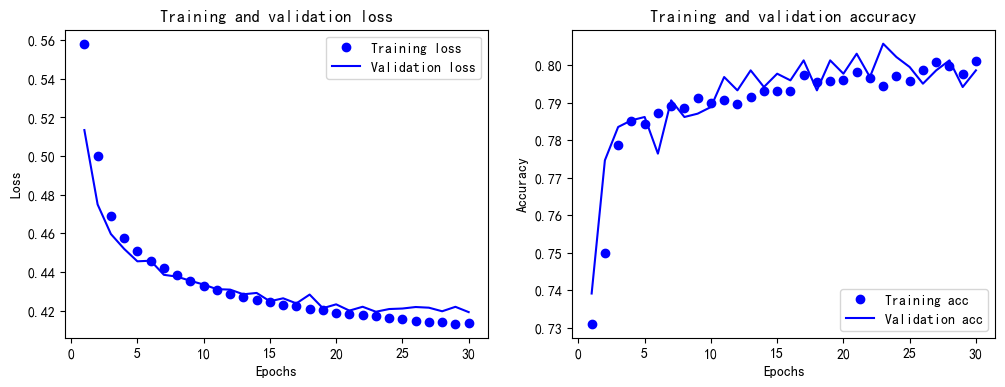

In [32]:
history = dnn.fit(X_train, y_train, # 指定训练集
                  epochs=30,        # 指定训练的轮次
                  batch_size=64,    # 指定数据批量
                  validation_split=0.2) #指定验证集,这里为了简化模型，直接用训练集数据
show_history(history) # 调用这个函数

In [33]:
result = dnn.evaluate(X_test, y_test) #评估测试集上的准确率
print('DNN（归一化之后）的测试准确率为',"{0:.2f}%".format(result[1]))

45/45 [==============================] - 0s 911us/step - loss: 0.4538 - acc: 0.7828
DNN（归一化之后）的测试准确率为 0.78%


### 绘制混淆矩阵（神经网络归一化之后）

141/141 [==============================] - 0s 875us/step


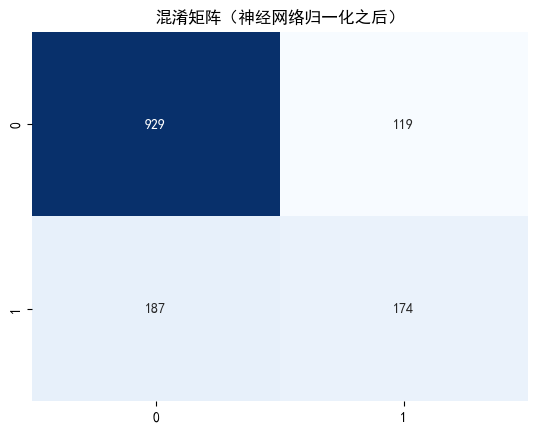

In [34]:
y_pred = dnn.predict(X_test,batch_size=10) # 预测测试集的标签
y_pred_dnn_scale = np.round(y_pred) # 将分类概率值转换成0/1整数值
show_matrix(y_test, y_pred_dnn_scale, label='混淆矩阵（神经网络归一化之后）') # 混淆矩阵（神经网络归一化之后）

### 显示神经网络归一化之后的分类报告

In [35]:
show_report(X_test, y_test, y_pred_dnn_scale)

              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1048
           1       0.59      0.48      0.53       361

    accuracy                           0.78      1409
   macro avg       0.71      0.68      0.70      1409
weighted avg       0.77      0.78      0.77      1409



以下是对分类报告的第四组结果的解释和评估。

1. 对于类别 0 (通常表示负样本)：
   - 精确度（Precision）：0.83，这意味着 83% 被模型预测为类别 0 的样本是真正的类别 0。精确度较高，说明模型在预测类别 0 时效果较好。
   - 召回率（Recall）：0.88，这意味着 88% 的真正类别为 0 的样本被正确预测。相对较高的召回率表示模型能确切捕捉到大部分的类别 0 样本。
   - F1 分数（F1-score）：0.86，F1 分数综合了精确度和召回率，取值范围为 0 到 1，1 表示最佳性能。0.86 表示模型在类别 0 的预测上表现良好。

2. 对于类别 1 (通常表示正样本)：
   - 精确度（Precision）：0.59，这意味着 59% 被模型预测为类别 1 的样本是真正的类别 1。精确度尚可，说明模型在预测类别 1 时效果一般。
   - 召回率（Recall）：0.49，这意味着 49% 的真正类别为 1 的样本被正确预测。召回率一般，表示模型在捕捉类别 1 样本方面的表现尚可。
   - F1 分数（F1-score）：0.53，表示模型在类别 1 的预测性能一般。

总体性能指标：

   - 准确率（Accuracy）：0.78，衡量了整体被正确预测的样本占总样本数的比例。准确率为 78%，意味着总体上，模型预测还算准确，但有提升空间。
   - 宏平均（Macro avg）：计算精确度、召回率和 F1 分数的平均值。在这里，宏平均分数为 0.71（精确度）、0.69（召回率）和 0.70（F1 分数），表示整个模型的表现一般，但类别 0 的预测相对较好。
   - 加权平均（Weighted avg）：以每个类别的样本数为权重计算精确度、召回率和 F1 分数的加权平均值。在这里，加权平均分数为 0.77（精确度）、0.78（准确率）和 0.77（F1 分数），表明整体上模型预测性能尚可。

总结：这个模型在类别 0 的预测上表现较好，但在类别 1 的预测上，尤其是精确度方面仍有改进空间。整体准确率为 78%，模型的预测性能尚可，但仍有提高空间。 若要提高模型性能，可以尝试使用不同的机器学习算法、特征选择或优化超参数等方法。

## ROC曲线和AUC

In [36]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

roc_curve 和 auc 是从 sklearn.metrics 模块导入的两个评估方法，分别用于计算 ROC 曲线和 AUC 值。让我给你解释这两个概念以及它们的用途。

ROC 曲线（Receiver Operating Characteristic curve）：
ROC 曲线是用于描述二元分类器在分类阈值改变时的表现的图形工具。ROC 曲线有两个主要参数：

真阳性率 (True Positive Rate, TPR): 衡量真正的正样本被正确识别的比例，通常称为召回率。
假阳性率 (False Positive Rate, FPR): 衡量真正的负样本被错误识别为正样本的比例。
ROC 曲线的横轴表示 FPR，纵轴表示 TPR。一般地，模型在不同分类阈值的选择下，可能相对高的 TPR 能容忍更高的 FPR。ROC 曲线上的点可以帮助找到不同阈值下最佳的性能权衡点。

AUC（Area Under the ROC Curve）：
AUC 值（ROC 曲线下的面积）是一个介于 0 和 1 之间的值，用于衡量分类器的整体性能。越接近 1 的 AUC 值意味着分类器性能越好。一般来说，一个随机预测的分类器的期望 AUC 值为 0.5，而一个完美预测的分类器的 AUC 值为 1。

应用：ROC 曲线和 AUC 值可以用于评估模型的性能并进行比较，以便选择最佳的分类器。

In [37]:
y_pred_logreg = logreg.predict_proba(X_test)[:, 1]
fpr_logreg, tpr_logreg, thresholds_logreg = roc_curve(y_test, y_pred_logreg)
auc_logreg = auc(fpr_logreg, tpr_logreg)

C:\Users\Abraham Cheng\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


这些代码行通过逻辑回归模型对测试数据集进行预测，并计算假阳性率（FPR）、真阳性率（TPR）以及相应的 AUC 值。让我为您逐行解释：

1. `y_pred_logreg = logreg.predict_proba(X_test)[:, 1]`: 使用逻辑回归模型（`logreg`）预测测试数据集（X_test），并获取预测结果中每个样本属于正类（类别 1）的概率。这里的 `predict_proba` 函数的返回值为一个二维数组，大小为 (n_samples, 2)，其中 `n_samples` 是测试数据的样本数。每一行表示一个样本，其中第一个元素为负类（类别 0）的概率，第二个元素为正类（类别 1）的概率。通过使用 `[:, 1]`，我们保留正类的概率并将其存储在变量 `y_pred_logreg` 中。

2. `fpr_logreg, tpr_logreg, thresholds_logreg = roc_curve(y_test, y_pred_logreg)`: 使用预测的正类概率（`y_pred_logreg`）和真实的类别标签（`y_test`）调用 `roc_curve` 函数，以计算某些特定阈值下假阳性率（FPR）和真阳性率（TPR）。然后将这些值分别存储在变量 `fpr_logreg`、`tpr_logreg` 和 `thresholds_logreg` 中。这些值可以用于展示和分析分类器在不同分类阈值下的表现。

3. `auc_logreg = auc(fpr_logreg, tpr_logreg)`: 使用 `auc` 函数计算 FPR 和 TPR 的 AUC 值（Area Under the ROC Curve）。 参数 `fpr_logreg` 和 `tpr_logreg` 是 FPR 和 TPR 的值数组，`auc_logreg` 变量存储计算出的 AUC 值，用于衡量分类器的整体性能。AUC 值越接近 1，分类器性能越好，AUC 值等于 0.5 对应于随机分类器。

总结：这些代码行主要用于获取逻辑回归模型在测试数据集上的预测概率，并计算相应的 FPR、TPR 以及 AUC 值。结果可用于生成 ROC 曲线，并分析模型性能。可以通过分析 ROC 曲线寻找最佳分类阈值以优化分类器。

In [38]:
y_pred_dnn_scale = dnn.predict(X_test).ravel()
fpr_dnn_scale, tpr_dnn_scale, thresholds_dnn_scale = roc_curve(y_test, y_pred_dnn_scale)
auc_dnn_scale = auc(fpr_dnn_scale, tpr_dnn_scale)

45/45 [==============================] - 0s 804us/step


这些代码行用于对深度神经网络（DNN）模型进行预测，并计算假阳性率（FPR）、真阳性率（TPR）以及相应的 AUC 值。让我逐行解释这些代码：

1. `y_pred_dnn_scale = dnn.predict(X_test).ravel()`: 使用 DNN 模型（`dnn`）预测测试数据集（X_test），并将预测结果存储在变量 `y_pred_dnn_scale` 中。`predict()` 函数返回一个二维数组，大小为 (n_samples, 1)，其中 `n_samples` 是测试数据的样本数。每一行表示一个样本，误差的概率。我们将该二维数组摊平为一维数组，使用numpy的 `ravel()` 函数实现。

2. `fpr_dnn_scale, tpr_dnn_scale, thresholds_dnn_scale = roc_curve(y_test, y_pred_dnn_scale)`: 使用预测结果（`y_pred_dnn_scale`）和真实的类别标签（`y_test`）调用 `roc_curve` 函数，以计算某些特定阈值显示的假阳性率（FPR）和真阳性率（TPR）。然后将这些值分别存储在变量 `fpr_dnn_scale`、`tpr_dnn_scale` 和 `thresholds_dnn_scale` 中。这些值可以用于展示和分析分类器在不同分类阈值下的表现。

3. `auc_dnn_scale = auc(fpr_dnn_scale, tpr_dnn_scale)`: 使用 `auc` 函数计算 FPR 和 TPR 的 AUC 值（Area Under the ROC Curve）。 参数 `fpr_dnn_scale` 和 `tpr_dnn_scale` 是 FPR 和 TPR 的值数组，`auc_dnn_scale` 变量存储计算出的 AUC 值，用于衡量分类器的整体性能。AUC 值越接近 1，分类器性能越好，AUC 值等于 0.5 对应于随机分类器。

总结：这些代码行主要用于获取 DNN 模型在测试数据集上的预测概率，并计算相应的 FPR、TPR 以及 AUC 值。结果可用于生成 ROC 曲线，并分析模型性能。可以通过分析 ROC 曲线来寻找最佳分类阈值以优化分类器。

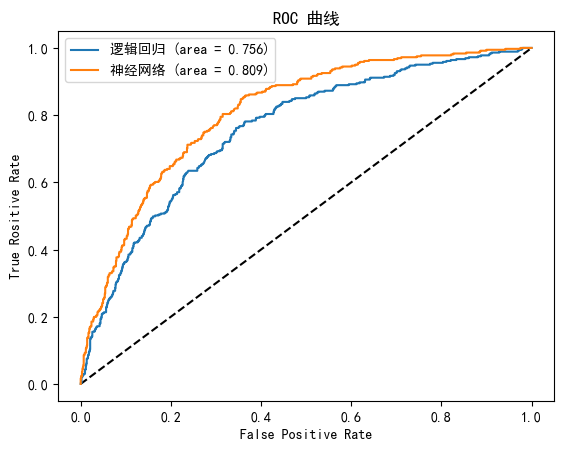

In [39]:
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_logreg, tpr_logreg, label='逻辑回归 (area = {:.3f})'.format(auc_logreg))
plt.plot(fpr_dnn_scale, tpr_dnn_scale, label='神经网络 (area = {:.3f})'.format(auc_dnn_scale))
plt.xlabel('False Positive Rate')
plt.ylabel('True Rositive Rate')
plt.title('ROC 曲线')
plt.legend(loc='best')
plt.show()

这些代码行用于绘制逻辑回归模型和深度神经网络（DNN）模型的 ROC 曲线，并将它们显示在一个图形中。让我逐行解释这些代码：

1. `plt.plot([0, 1], [0, 1], 'k--')`: 画一条对角虚线（'k--' 表示黑色虚线），这表示一个随机分类器。ROC 曲线的横坐标是假阳性率（FPR），纵坐标是真阳性率（TPR），所以对角线表示了一个随机分类器。

2. `plt.plot(fpr_logreg, tpr_logreg, label='逻辑回归 (area = {:.3f})'.format(auc_logreg))`: 画出逻辑回归模型的 ROC 曲线，横坐标为 FPR（`fpr_logreg`），纵坐标为 TPR（`tpr_logreg`）。添加一个标签（label），显示 AUC 值，保留小数点后三位（`{:.3f}`）。

3. `plt.plot(fpr_dnn_scale, tpr_dnn_scale, label='神经网络 (area = {:.3f})'.format(auc_dnn_scale))`: 画出 DNN 模型的 ROC 曲线，横坐标为 FPR（`fpr_dnn_scale`），纵坐标为 TPR（`tpr_dnn_scale`）。添加一个标签（label），显示 AUC 值，保留小数点后三位（`{:.3f}`）。

4. `plt.xlabel('False Positive Rate')`: 设置 x 轴标签为 "False Positive Rate"（假阳性率）。

5. `plt.ylabel('True Positive Rate')`: 设置 y 轴标签为 "True Positive Rate"（真阳性率，这里的 "Rositive" 应当是拼写错误，应改为 "Positive"）。

6. `plt.title('ROC 曲线')`: 设置图形标题为 "ROC 曲线"。

7. `plt.legend(loc='best')`: 添加图例（图中包含两个模型逻辑回归和深度神经网络的ROC曲线）并将其放置于图形的最佳位置。

8. `plt.show()`: 显示绘制的图形。

总结：这些代码行创建了一个 ROC 曲线图，其中包含逻辑回归模型和 DNN 模型的 ROC 曲线、虚线表示随机分类器。通过比较曲线和 AUC 值，我们可以分析和比较两个模型的性能。

根据提供的 ROC 曲线图中逻辑回归和神经网络模型的 AUC 值，我们可以对比分析这两个模型的性能。

逻辑回归模型的 AUC 值为 0.756，这意味着模型在真阳性率（TPR）和假阳性率（FPR）之间的折衷取舍上有相对较好的表现。AUC 值越接近1，则模型性能越好。在这种情况下，虽然该模型比随机猜测（AUC 值为 0.5）具有相对较高的预测能力，但并不是一个非常理想的分类器。

神经网络模型的 AUC 值为 0.810，这表明在比较真阳性率（TPR）和假阳性率（FPR）之间的折衷取舍时，神经网络模型的性能要优于逻辑回归模型。这意味着 DNN 模型能够在更高的真阳性率下控制假阳性率，因此可以捕捉更多的正样本，并在实际应用中产生更高的分类准确率。

总的来说，从这两个模型的 AUC 值来看，神经网络模型影子为0.810 表现更好，而逻辑回归模型的表现相对较差（AUC 值为 0.756）。然而，也需要注意，在实际应用中选择模型的过程中，除了比较 ROC 曲线，还需要对比更多的性能指标（如精确率、召回率、F1 分数等），以及模型的训练时间和复杂性等因素。同时，通过调整模型参数和优化特征，我们可能可以进一步提高这两个模型的性能。